In [2]:
import pandas as pd

df = pd.read_excel('HR_Employee_Data.xlsx')

def assign_label_alternative(row):
    satisfaction = row['satisfaction_level']
    evaluation = row['last_evaluation']
    hours = row['average_montly_hours']
    time = row['time_spend_company']
    
    satisfaction_category = 'high' if satisfaction > 0.7 else 'medium' if satisfaction >= 0.4 else 'low'
    evaluation_category = 'very_high' if evaluation > 0.8 else 'high' if evaluation >= 0.6 else 'medium' if evaluation >= 0.4 else 'low'
    hours_category = 'high' if hours > 220 else 'medium' if hours >= 160 else 'low'
    time_category = 'long' if time > 5 else 'medium' if time >= 3 else 'short'
    
    if satisfaction_category in ['high', 'medium'] and evaluation_category in ['high', 'very_high'] and hours_category in ['high', 'medium'] and time_category in ['medium', 'long']:
        return 'baik'
    elif satisfaction_category == 'low' or (evaluation_category in ['low', 'medium'] and hours_category == 'low' and time_category == 'short'):
        return 'kurang'
    else:
        return 'cukup baik'

df['performance'] = df.apply(assign_label_alternative, axis=1)

alternative_output_path = 'HR_Employee_Dataset.xlsx'
df.to_excel(alternative_output_path, index=False)

df[['Emp_Id', 'satisfaction_level', 'last_evaluation', 'average_montly_hours',
    'time_spend_company', 'performance']].head(), alternative_output_path 

(     Emp_Id  satisfaction_level  last_evaluation  average_montly_hours  \
 0  IND02438                0.38             0.53                   157   
 1  IND28133                0.80             0.86                   262   
 2  IND07164                0.11             0.88                   272   
 3  IND30478                0.72             0.87                   223   
 4  IND24003                0.37             0.52                   159   
 
    time_spend_company performance  
 0                   3      kurang  
 1                   6        baik  
 2                   4      kurang  
 3                   5        baik  
 4                   3      kurang  ,
 'HR_Employee_Dataset.xlsx')

In [10]:
import pandas as pd

# Baca dataset
file_path = "HR_Employee_Dataset.xlsx"
data = pd.read_excel(file_path)

# Pisahkan fitur dan label
features = ['satisfaction_level', 'last_evaluation','number_project','average_montly_hours',
            'time_spend_company','Work_accident','left','promotion_last_5years']
label = 'performance'

X = data[features]
y = data[label]


In [13]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=5)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print(selected_features)

Index(['satisfaction_level', 'last_evaluation', 'average_montly_hours',
       'time_spend_company', 'left'],
      dtype='object')


In [14]:
# Cek apakah ada nilai kosong di dataset
print(data.isnull().sum())

Emp_Id                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
label_alternative        0
performance              0
dtype: int64


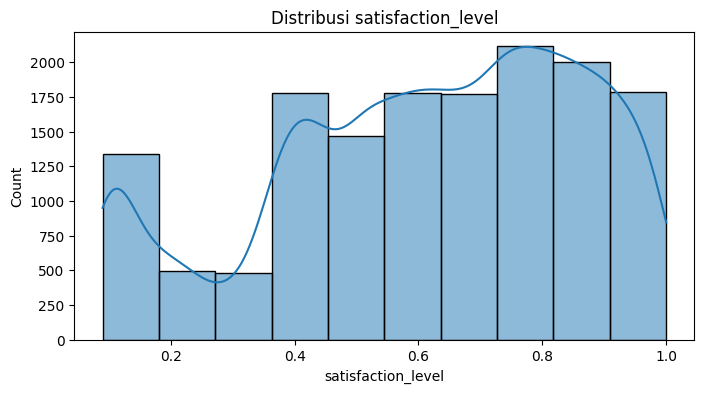

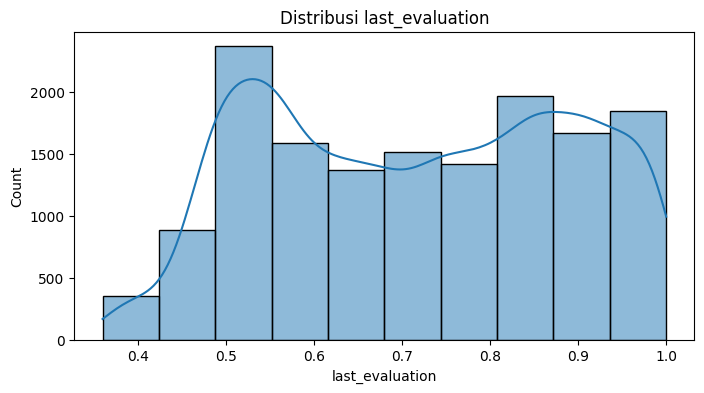

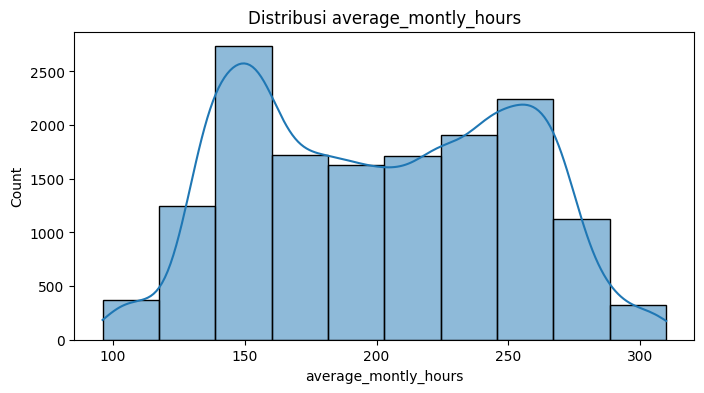

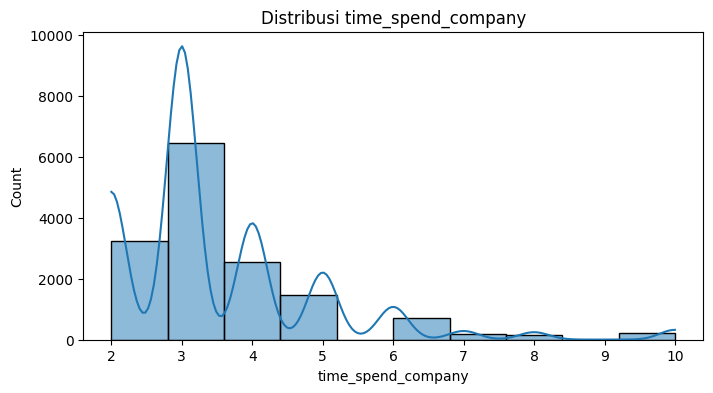

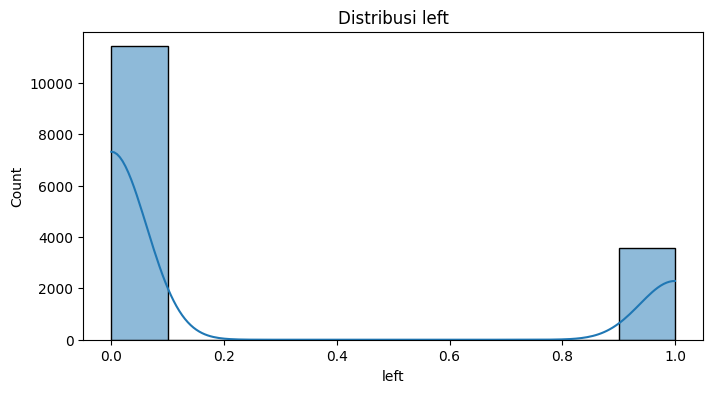

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribusi untuk fitur
features = ['satisfaction_level', 'last_evaluation', 'average_montly_hours','time_spend_company', 'left']

for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], kde=True, bins=10)
    plt.title(f"Distribusi {feature}")
    plt.show()

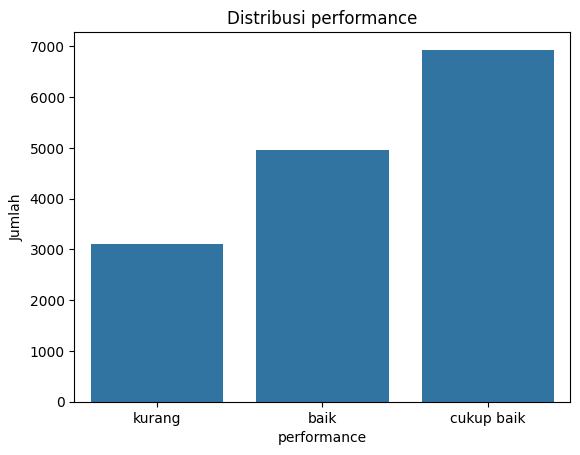

In [17]:
# Distribusi label
sns.countplot(x='performance', data=data)
plt.title("Distribusi performance")
plt.xlabel("performance")
plt.ylabel("Jumlah")
plt.show()

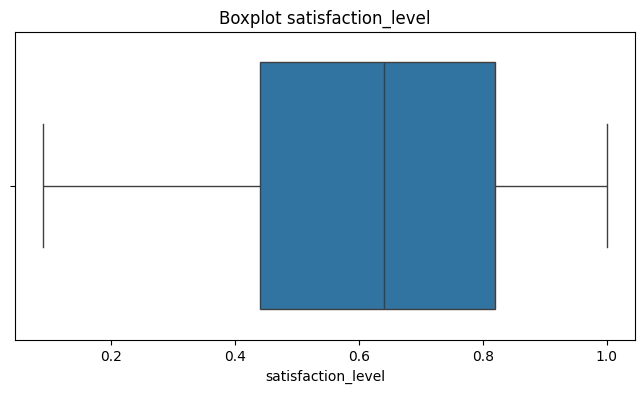

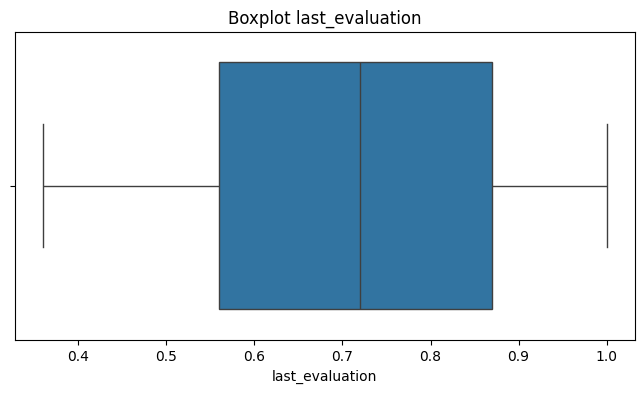

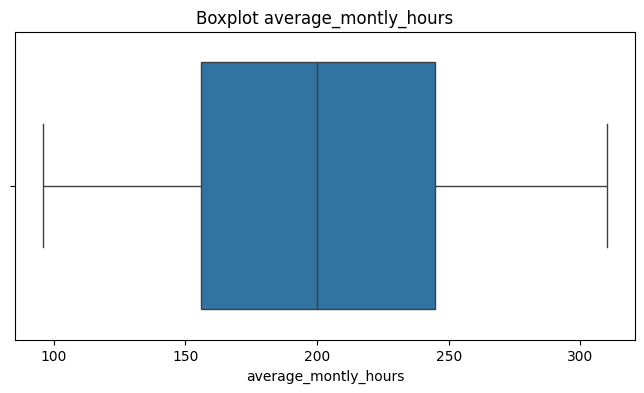

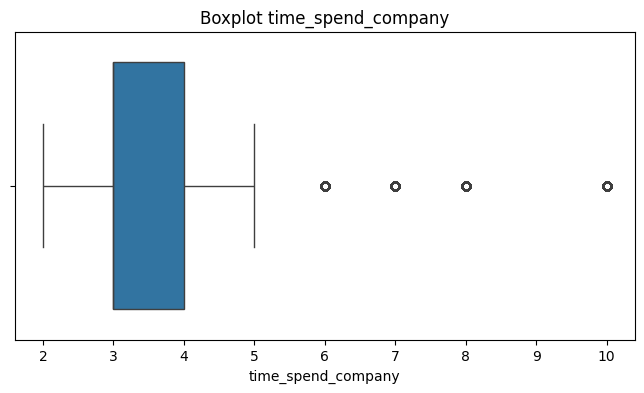

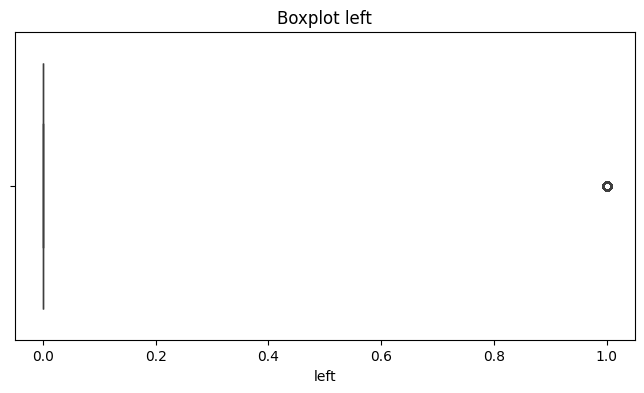

In [18]:
# Visualisasi boxplot
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[feature])
    plt.title(f"Boxplot {feature}")
    plt.show()

In [19]:
from sklearn.model_selection import train_test_split

# Misalkan X adalah fitur dan y adalah label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Misalkan X adalah fitur dan y adalah label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menggabungkan X_train dan y_train untuk menyimpan data train
train_data = pd.concat([X_train, y_train], axis=1)
train_data.to_csv('train.csv', index=False)

# Menggabungkan X_test dan y_test untuk menyimpan data test
test_data = pd.concat([X_test, y_test], axis=1)
test_data.to_csv('test.csv', index=False)

print("Data train dan test telah disimpan ke dalam file CSV.")


Data train dan test telah disimpan ke dalam file CSV.


In [23]:
import pandas as pd
import numpy as np

# Baca file CSV (pastikan sudah ada file 'train_data.csv')
file_path = 'train.csv'
dataset = pd.read_csv(file_path)

print("Dataset:")
print(dataset.head())

# Fungsi entropy
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy_val = -np.sum([(counts[i] / np.sum(counts)) * np.log2(counts[i] / np.sum(counts)) for i in range(len(elements))])
    return entropy_val

# Fungsi Information Gain
def information_gain(data, split_attr, target_col):
    # Entropy total sebelum split
    total_entropy = entropy(data[target_col])
    
    # Hitung entropy rata-rata setelah split
    vals, counts = np.unique(data[split_attr], return_counts=True)
    weighted_entropy = np.sum([(counts[i] / np.sum(counts)) * entropy(data[data[split_attr] == vals[i]][target_col]) for i in range(len(vals))])
    
    # IG = Entropy total - Weighted entropy
    info_gain = total_entropy - weighted_entropy
    return info_gain

# Fungsi untuk membangun pohon keputusan
def decision_tree(data, original_data, features, target_col, parent_class=None):
    # Jika hanya ada satu kelas dalam data, kembalikan kelas tersebut
    if len(np.unique(data[target_col])) <= 1:
        return np.unique(data[target_col])[0]
    
    # Jika data kosong, gunakan kelas mayoritas dari data asli
    elif len(data) == 0:
        return np.unique(original_data[target_col])[np.argmax(np.unique(original_data[target_col], return_counts=True)[1])]
    
    # Jika tidak ada fitur lagi untuk diproses, gunakan kelas mayoritas
    elif len(features) == 0:
        return parent_class
    
    else:
        # Tetapkan kelas mayoritas sebagai parent_class
        parent_class = np.unique(data[target_col])[np.argmax(np.unique(data[target_col], return_counts=True)[1])]
        
        # Pilih fitur dengan Information Gain tertinggi
        ig_values = [information_gain(data, feature, target_col) for feature in features]
        best_feature = features[np.argmax(ig_values)]
        
        # Buat sub-pohon untuk fitur terbaik
        tree = {best_feature: {}}
        
        # Hapus fitur terbaik dari daftar fitur
        features = [f for f in features if f != best_feature]
        
        # Untuk setiap nilai unik dalam fitur terbaik, buat cabang
        for value in np.unique(data[best_feature]):
            sub_data = data.where(data[best_feature] == value).dropna()
            subtree = decision_tree(sub_data, dataset, features, target_col, parent_class)
            tree[best_feature][value] = subtree
        
        return tree

# Fungsi untuk prediksi menggunakan pohon keputusan
def predict(tree, sample):
    # Jika pohon adalah nilai akhir (leaf node), kembalikan nilai tersebut
    if not isinstance(tree, dict):
        return tree
    
    # Ambil fitur terbaik
    feature = list(tree.keys())[0]
    feature_value = sample[feature]
    
    # Lanjutkan ke cabang pohon yang sesuai dengan nilai fitur
    if feature_value in tree[feature]:
        return predict(tree[feature][feature_value], sample)
    else:
        return None  # Jika nilai fitur tidak ditemukan dalam cabang pohon

# Mengukur akurasi model
def accuracy(tree, data, target_col):
    correct = 0
    total = len(data)
    
    # Prediksi untuk setiap baris data
    for _, row in data.iterrows():
        prediction = predict(tree, row)
        if prediction == row[target_col]:
            correct += 1
    
    # Hitung akurasi
    return correct / total

# Identifikasi target kolom secara otomatis
target_col = 'performance'  # Ubah sesuai dengan nama kolom target Anda

# Ambil semua kolom kecuali kolom target sebagai fitur
features = [col for col in dataset.columns if col != target_col]

# Bangun pohon keputusan
tree = decision_tree(dataset, dataset, features, target_col)

# Mengukur akurasi model
acc = accuracy(tree, dataset, target_col)

# Tampilkan hasil pohon dan akurasi
print("Pohon Keputusan:")
print(tree)
print(f"Akurasi Model: {acc * 100:.2f}%")


Dataset:
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                1.00             0.61               3                   188   
1                0.16             0.78               4                   196   
2                0.80             0.80               3                   175   
3                0.66             0.86               4                   112   
4                0.11             0.93               7                   284   

   time_spend_company  Work_accident  left  promotion_last_5years performance  
0                   4              0     0                      0        baik  
1                   5              0     0                      0      kurang  
2                   2              0     0                      0  cukup baik  
3                   6              0     0                      0  cukup baik  
4                   4              0     1                      0      kurang  
Pohon Keputusan:
{'satisfactio

In [24]:
import pandas as pd
import numpy as np

# Membaca dataset dari file Excel
file_path_train = 'train.csv'  # Ganti dengan nama file Excel Anda
file_path_test = 'test.csv'    # Ganti dengan nama file Excel Anda untuk data uji

# Membaca data latih dan data uji
dataset_train = pd.read_csv(file_path_train)
dataset_test = pd.read_csv(file_path_test)

# Fungsi untuk menghitung entropy
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy_val = -np.sum([(counts[i]/np.sum(counts)) * np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy_val

# Fungsi untuk menghitung Information Gain
def information_gain(data, split_attr, target_col):
    total_entropy = entropy(data[target_col])
    vals, counts = np.unique(data[split_attr], return_counts=True)
    weighted_entropy = np.sum([(counts[i]/np.sum(counts)) * entropy(data[data[split_attr] == vals[i]][target_col]) for i in range(len(vals))])
    return total_entropy - weighted_entropy

# Fungsi untuk membangun decision tree
def decision_tree(data, original_data, features, target_col, parent_class=None):
    if len(np.unique(data[target_col])) <= 1:
        return np.unique(data[target_col])[0]
    elif len(data) == 0:
        return np.unique(original_data[target_col])[np.argmax(np.unique(original_data[target_col], return_counts=True)[1])]
    elif len(features) == 0:
        return parent_class
    else:
        parent_class = np.unique(data[target_col])[np.argmax(np.unique(data[target_col], return_counts=True)[1])]
        ig_values = [information_gain(data, feature, target_col) for feature in features]
        best_feature = features[np.argmax(ig_values)]
        tree = {best_feature: {}}
        features = [f for f in features if f != best_feature]
        for value in np.unique(data[best_feature]):
            sub_data = data.where(data[best_feature] == value).dropna()
            subtree = decision_tree(sub_data, dataset, features, target_col, parent_class)
            tree[best_feature][value] = subtree
        return tree

# Fungsi untuk memprediksi label dengan decision tree
def predict(tree, data_point):
    # Menelusuri tree sesuai dengan fitur dan nilai yang ada di data_point
    for feature, branches in tree.items():
        value = data_point[feature]
        if value in branches:
            # Jika cabang ditemukan, lanjutkan ke cabang berikutnya
            branch = branches[value]
            if isinstance(branch, dict):
                # Jika cabang berikutnya adalah pohon keputusan, lanjutkan pencarian
                return predict(branch, data_point)
            else:
                # Jika cabang berikutnya adalah label, kembalikan labelnya
                return branch

# Fitur dan target
features = ['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company','left']
target_col = 'performance'

# Bangun pohon keputusan menggunakan data latih
tree = decision_tree(dataset_train, dataset_train, features, target_col)

# Fungsi untuk menghitung akurasi
def calculate_accuracy(model, test_data, target_col):
    correct_predictions = 0
    total_predictions = len(test_data)
    for _, row in test_data.iterrows():
        prediction = predict(model, row)
        if prediction == row[target_col]:
            correct_predictions += 1
    accuracy = correct_predictions / total_predictions
    return accuracy

# Menghitung akurasi dengan data uji
accuracy = calculate_accuracy(tree, dataset_test, target_col)

# Tampilkan hasil akurasi
print(f"Akurasi Model: {accuracy * 100:.2f}%")


Akurasi Model: 58.93%


In [25]:
import pandas as pd
import numpy as np
from collections import Counter

# Membaca dataset dari file CSV
file_path_train = 'train.csv'  # Ganti dengan nama file data latih Anda
file_path_test = 'test.csv'    # Ganti dengan nama file data uji Anda

# Membaca data latih dan data uji
dataset_train = pd.read_csv(file_path_train)
dataset_test = pd.read_csv(file_path_test)

# Fungsi untuk menghitung entropy
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy_val = -np.sum([(counts[i]/np.sum(counts)) * np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy_val

# Fungsi untuk menghitung Information Gain
def information_gain(data, split_attr, target_col):
    total_entropy = entropy(data[target_col])
    vals, counts = np.unique(data[split_attr], return_counts=True)
    weighted_entropy = np.sum([(counts[i]/np.sum(counts)) * entropy(data[data[split_attr] == vals[i]][target_col]) for i in range(len(vals))])
    return total_entropy - weighted_entropy

# Fungsi untuk membangun decision tree
def decision_tree(data, original_data, features, target_col, parent_class=None):
    if len(np.unique(data[target_col])) <= 1:
        return np.unique(data[target_col])[0]
    elif len(data) == 0:
        return np.unique(original_data[target_col])[np.argmax(np.unique(original_data[target_col], return_counts=True)[1])]
    elif len(features) == 0:
        return parent_class
    else:
        parent_class = np.unique(data[target_col])[np.argmax(np.unique(data[target_col], return_counts=True)[1])]
        ig_values = [information_gain(data, feature, target_col) for feature in features]
        best_feature = features[np.argmax(ig_values)]
        tree = {best_feature: {}}
        features = [f for f in features if f != best_feature]
        for value in np.unique(data[best_feature]):
            sub_data = data.where(data[best_feature] == value).dropna()
            subtree = decision_tree(sub_data, dataset_train, features, target_col, parent_class)
            tree[best_feature][value] = subtree
        return tree

# Fungsi untuk memprediksi label dengan decision tree
def predict(tree, data_point):
    # Menelusuri tree sesuai dengan fitur dan nilai yang ada di data_point
    for feature, branches in tree.items():
        value = data_point[feature]
        if value in branches:
            # Jika cabang ditemukan, lanjutkan ke cabang berikutnya
            branch = branches[value]
            if isinstance(branch, dict):
                # Jika cabang berikutnya adalah pohon keputusan, lanjutkan pencarian
                return predict(branch, data_point)
            else:
                # Jika cabang berikutnya adalah label, kembalikan labelnya
                return branch

# Fungsi untuk membangun Random Forest
def random_forest(data, n_trees, features, target_col):
    trees = []
    for _ in range(n_trees):
        # Ambil sampel bootstrapped dari data (sampling dengan pengulangan)
        sample_data = data.sample(n=len(data), replace=True)
        
        # Bangun pohon keputusan untuk sampel ini
        tree = decision_tree(sample_data, data, features, target_col)
        trees.append(tree)
    
    return trees

# Fungsi untuk prediksi dengan Random Forest (voting)
def rf_predict(trees, row):
    predictions = []
    for tree in trees:
        predictions.append(predict(tree, row))  # Menggunakan fungsi prediksi yang sudah ada
    
    # Voting untuk menentukan prediksi akhir
    return Counter(predictions).most_common(1)[0][0]

# Fungsi untuk menghitung akurasi
def calculate_accuracy(trees, test_data, target_col):
    correct_predictions = 0
    total_predictions = len(test_data)
    for _, row in test_data.iterrows():
        prediction = rf_predict(trees, row)
        if prediction == row[target_col]:
            correct_predictions += 1
    accuracy = correct_predictions / total_predictions
    return accuracy

# Fitur dan target
features = ['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company', 'left']
target_col = 'performance'

# Bangun Random Forest dengan 10 pohon keputusan
n_trees = 10
rf_trees = random_forest(dataset_train, n_trees, features, target_col)

# Menghitung akurasi dengan data uji
accuracy = calculate_accuracy(rf_trees, dataset_test, target_col)

# Tampilkan hasil akurasi
print(f"Akurasi Random Forest: {accuracy * 100:.2f}%")

Akurasi Random Forest: 56.00%


In [28]:
import pandas as pd
import numpy as np
import random
from collections import Counter

# Memuat data
file_path_train = 'train.csv'  # Ganti dengan nama file data latih Anda
file_path_test = 'test.csv'    # Ganti dengan nama file data uji Anda

dataset_train = pd.read_csv(file_path_train)
dataset_test = pd.read_csv(file_path_test)

# Fungsi menghitung entropy
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy_val = -np.sum([(counts[i] / np.sum(counts)) * np.log2(counts[i] / np.sum(counts)) for i in range(len(elements))])
    return entropy_val

# Fungsi menghitung Information Gain
def information_gain(data, split_attr, target_col):
    total_entropy = entropy(data[target_col])
    vals, counts = np.unique(data[split_attr], return_counts=True)
    weighted_entropy = np.sum([(counts[i] / np.sum(counts)) * entropy(data[data[split_attr] == vals[i]][target_col]) for i in range(len(vals))])
    return total_entropy - weighted_entropy

# Fungsi membangun decision tree
def decision_tree(data, original_data, features, target_col, parent_class=None):
    if len(np.unique(data[target_col])) <= 1:
        return np.unique(data[target_col])[0]
    elif len(data) == 0:
        return np.unique(original_data[target_col])[np.argmax(np.unique(original_data[target_col], return_counts=True)[1])]
    elif len(features) == 0:
        return parent_class
    else:
        parent_class = np.unique(data[target_col])[np.argmax(np.unique(data[target_col], return_counts=True)[1])]
        ig_values = [information_gain(data, feature, target_col) for feature in features]
        best_feature = features[np.argmax(ig_values)]
        tree = {best_feature: {}}
        features = [f for f in features if f != best_feature]
        for value in np.unique(data[best_feature]):
            sub_data = data[data[best_feature] == value]
            subtree = decision_tree(sub_data, original_data, features, target_col, parent_class)
            tree[best_feature][value] = subtree
        return tree

# Fungsi prediksi menggunakan decision tree
def predict(tree, data_point):
    for feature, branches in tree.items():
        value = data_point[feature]
        if value in branches:
            branch = branches[value]
            if isinstance(branch, dict):
                return predict(branch, data_point)
            else:
                return branch

# Fungsi membangun Random Forest
def random_forest(data, features, target_col, n_trees=5, max_features=2):
    forest = []
    for _ in range(n_trees):
        # Mengambil sampel bootstrap dari data
        bootstrap_sample = data.sample(frac=1, replace=True)
        
        # Memilih fitur acak
        random_features = random.sample(features, max_features)
        
        # Membangun pohon keputusan
        tree = decision_tree(bootstrap_sample, data, random_features, target_col)
        forest.append(tree)
    return forest

# Fungsi prediksi untuk Random Forest
def predict_forest(forest, data_point):
    predictions = [predict(tree, data_point) for tree in forest]
    return max(set(predictions), key=predictions.count)

# Fungsi untuk menghitung akurasi Random Forest
def calculate_accuracy(trees, test_data, target_col):
    correct_predictions = 0
    total_predictions = len(test_data)
    for _, row in test_data.iterrows():
        prediction = predict_forest(trees, row)
        if prediction == row[target_col]:
            correct_predictions += 1
    accuracy = correct_predictions / total_predictions
    return accuracy

# Fungsi untuk Voting Ensemble antara Decision Tree dan Random Forest
def predict_voting(dt_tree, rf_forest, data_point):
    dt_prediction = predict(dt_tree, data_point)
    rf_prediction = predict_forest(rf_forest, data_point)
    combined_predictions = [dt_prediction, rf_prediction]
    return max(set(combined_predictions), key=combined_predictions.count)

# Fungsi untuk menghitung Akurasi Voting Ensemble
def evaluate_model(dt_tree, rf_forest, test_data, target_col):
    predictions = []
    true_labels = test_data[target_col].values
    for _, row in test_data.iterrows():
        prediction = predict_voting(dt_tree, rf_forest, row)
        predictions.append(prediction)
    predictions = np.array(predictions)
    accuracy = np.mean(predictions == true_labels)
    return accuracy

# Fitur dan target yang digunakan
features = ['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company', 'left']
target_col = 'performance'

# Membangun Decision Tree (untuk Voting)
dt_tree = decision_tree(dataset_train, dataset_train, features, target_col)

# Membangun Random Forest
n_trees = 5
max_features = 3
rf_forest = random_forest(dataset_train, features, target_col, n_trees=n_trees, max_features=max_features)

# Evaluasi akurasi model Voting Ensemble
accuracy = evaluate_model(dt_tree, rf_forest, dataset_test, target_col)

# Output akurasi Voting Ensemble
print(f"Akurasi Voting Ensemble (Decision Tree + Random Forest): {accuracy * 100:.2f}%")

Akurasi Voting Ensemble (Decision Tree + Random Forest): 79.80%


In [34]:
from collections import Counter
import numpy as np
import pandas as pd 

file_path_train = 'train.csv'
file_path_test = 'test.csv'

dataset_train = pd.read_csv(file_path_train)
dataset_test = pd.read_csv(file_path_test)

def predict(tree, data_point):
    for feature, branches in tree.items():
        value = data_point[feature]
        if value in branches:
            branch = branches[value]
            if isinstance(branch, dict):
                return predict(branch, data_point)
            else:
                return branch # Jika sudah mencapai daun

# Fungsi prediksi menggunakan Random Forest
def predict_forest(forest, data_point):
    predictions = [predict(tree, data_point) for tree in forest]
    return max(set(predictions), key=predictions.count)

# Fungsi prediksi dengan Voting Ensemble 
def predict_voting(dt_tree, rf_forest, data_point):
    dt_prediction = predict(dt_tree, data_point)
    rf_prediction = predict_forest(rf_forest, data_point)
    combined_predictions = [dt_prediction, rf_prediction]
    return max(set(combined_predictions), key=combined_predictions.count)

# Menghitung confusion matrix
def confusion_matrix_metrics(test_data, dt_tree, rf_forest, target_col):
    conf_matrix = Counter()
    
    for _, row in test_data.iterrows():
        # Prediksi dengan Voting Ensemble
        prediction = predict_voting(dt_tree, rf_forest, row)  # Tidak perlu default_class
        actual = row[target_col]
        conf_matrix[(prediction, actual)] += 1
    
    return conf_matrix

# Menghitung metrik per kelas
def calculate_metrics_per_class(conf_matrix, unique_labels):
    metrics = {}
    
    for label in unique_labels:
        TP = conf_matrix[(label, label)] if (label, label) in conf_matrix else 0
        FP = sum([conf_matrix[(label, other)] for other in unique_labels if (label, other) in conf_matrix and other != label])
        FN = sum([conf_matrix[(other, label)] for other in unique_labels if (other, label) in conf_matrix and other != label])
        
        precision = TP / (TP + FP) if (TP + FP) != 0 else 0
        recall = TP / (TP + FN) if (TP + FN) != 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
        
        metrics[label] = {"precision": precision, "recall": recall, "f1_score": f1_score}
    
    return metrics

# Menghitung rata-rata metrik
def calculate_average_metrics(metrics, unique_labels):
    precision_avg = np.mean([metrics[label]["precision"] for label in unique_labels])
    recall_avg = np.mean([metrics[label]["recall"] for label in unique_labels])
    f1_avg = np.mean([metrics[label]["f1_score"] for label in unique_labels])
    
    return precision_avg, recall_avg, f1_avg

# Default class dari label mayoritas
default_class = dataset_train[target_col].mode()[0]

# Validasi data uji
dataset_test = dataset_test.fillna(dataset_train.mode().iloc[0])

# Hitung confusion matrix untuk Voting Ensemble
unique_labels = np.unique(dataset_test[target_col])
conf_matrix = confusion_matrix_metrics(dataset_test, tree, forest, target_col)

print("Confusion Matrix:")
for key, val in conf_matrix.items():
    print(f"{key}: {val}")

# Hitung metrik per kelas
metrics = calculate_metrics_per_class(conf_matrix, unique_labels)

print("\nMetrics Per Class:")
for label, metric in metrics.items():
    print(f"Class {label}:")
    print(f"  Precision: {metric['precision']:.2f}")
    print(f"  Recall:    {metric['recall']:.2f}")
    print(f"  F1-Score:  {metric['f1_score']:.2f}")

# Hitung rata-rata metrik
precision_avg, recall_avg, f1_avg = calculate_average_metrics(metrics, unique_labels)

print("\nOverall Average Metrics:")
print(f"Average Precision: {precision_avg:.2f}")
print(f"Average Recall:    {recall_avg:.2f}")
print(f"Average F1-Score:  {f1_avg:.2f}")

Confusion Matrix:
('cukup baik', 'cukup baik'): 959
('baik', 'cukup baik'): 172
('baik', 'baik'): 463
('kurang', 'kurang'): 578
(None, 'baik'): 164
('cukup baik', 'baik'): 353
(None, 'cukup baik'): 272
('cukup baik', 'kurang'): 29
('kurang', 'cukup baik'): 2
(None, 'kurang'): 8

Metrics Per Class:
Class baik:
  Precision: 0.73
  Recall:    0.57
  F1-Score:  0.64
Class cukup baik:
  Precision: 0.72
  Recall:    0.85
  F1-Score:  0.78
Class kurang:
  Precision: 1.00
  Recall:    0.95
  F1-Score:  0.97

Overall Average Metrics:
Average Precision: 0.81
Average Recall:    0.79
Average F1-Score:  0.80


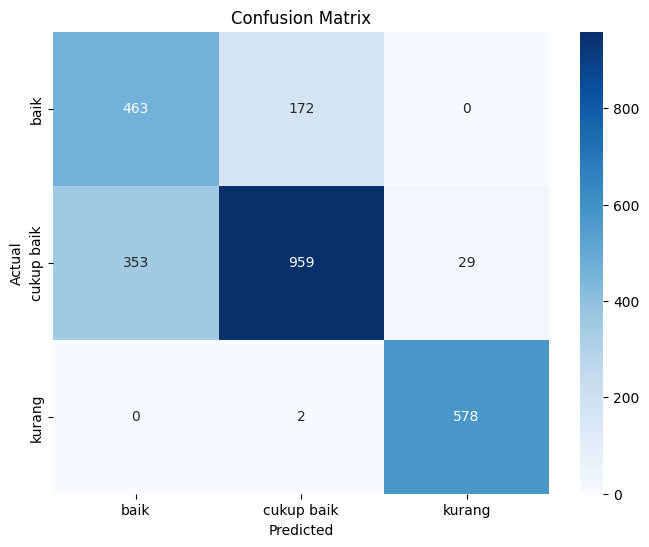

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat confusion matrix heatmap
conf_matrix_values = np.array([[conf_matrix.get((true, pred), 0) for pred in unique_labels] for true in unique_labels])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_values, annot=True, fmt="d", cmap="Blues", xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()